In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns; 
import matplotlib.pyplot as plt
import plotly.express as px

import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Data/cleaned_data_SC.csv', encoding='unicode_escape')
df.head()
df['Category Name'].unique()

array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
       'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
       "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
       "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
       'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
       'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
       'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
       'Golf Balls', 'Strength Training', "Children's Clothing",
       'Lacrosse', 'Baby ', 'Fishing', 'Books ', 'DVDs', 'CDs ', 'Garden',
       'Hockey', 'Pet Supplies', 'Health and Beauty', 'Music',
       'Video Games', 'Golf Gloves', 'Golf Bags & Carts', 'Golf Shoes',
       'Golf Apparel', "Women's Golf Clubs", "Men's Golf Clubs", 'Toys',
       'Water Sports', 'Indoor/Outdoor Games'], dtype=object)

In [8]:
data_sales=df[[  'Type', 'Days for shipping (real)',
       'Days for shipment (scheduled)', 'Benefit per order',
       'Sales per customer', 'Delivery Status', #'Late_delivery_risk',
       'Category Name', 'Customer City', 'Customer Country', #'Customer Id',
       'Customer Segment', 'Customer State', #'Customer Zipcode',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', #'Order Id', 
       'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 
       'Sales',
       #'Order Item Total', 'Order Profit Per Order', 
       # 'Order Region','Order State', 'Order Status', 
       'Product Name', 'Product Price',
       'shipping date (DateOrders)', 
       'Shipping Mode']]

In [9]:
features=data_sales.drop(columns=['Sales', 'Days for shipping (real)','Days for shipment (scheduled)','Sales per customer','Type','Delivery Status', 'Customer City', 'Customer Country','Customer Segment', 'Customer State', 'Order Country', 'order date (DateOrders)','Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity','shipping date (DateOrders)', 
       'Shipping Mode'])
target=data_sales['Sales']

In [10]:
features

,Benefit per order,Category Name,Department Name,Market,Order City,Product Name,Product Price
0,91.250000,Sporting Goods,Fitness,Pacific Asia,Bekasi,Smart watch,327.750000
1,-249.089996,Sporting Goods,Fitness,Pacific Asia,Bikaner,Smart watch,327.750000
2,-247.779999,Sporting Goods,Fitness,Pacific Asia,Bikaner,Smart watch,327.750000
3,22.860001,Sporting Goods,Fitness,Pacific Asia,Townsville,Smart watch,327.750000
4,134.210007,Sporting Goods,Fitness,Pacific Asia,Townsville,Smart watch,327.750000
...,...,...,...,...,...,...,...
180514,40.000000,Fishing,Fan Shop,Pacific Asia,ShanghÃ¡i,Field & Stream Sportsman 16 Gun Fire Safe,399.980011
180515,-613.770019,Fishing,Fan Shop,Pacific Asia,Hirakata,Field & Stream Sportsman 16 Gun Fire Safe,399.980011
180516,141.110001,Fishing,Fan Shop,Pacific Asia,Adelaide,Field & Stream Sportsman 16 Gun Fire Safe,399.980011
180517,186.229996,Fishing,Fan Shop,Pacific Asia,Adelaide,Field & Stream Sportsman 16 Gun Fire Safe,399.980011


In [11]:
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [12]:
features=features.apply(Labelencoder_feature)
features.head()

,Benefit per order,Category Name,Department Name,Market,Order City,Product Name,Product Price
0,18934,40,4,3,331,78,62
1,2272,40,4,3,391,78,62
2,2293,40,4,3,391,78,62
3,13638,40,4,3,3226,78,62
4,20599,40,4,3,3226,78,62


In [13]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

In [14]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [15]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

,Variable,F_Value,P_Value
0,Benefit per order,13782.670150,0.000
1,Category Name,26066.331991,0.000
2,Department Name,524.094617,0.000
3,Market,240.910781,0.000
5,Product Name,37751.723070,0.000
6,Product Price,116680.120560,0.000
4,Order City,8.763986,0.003


In [16]:
f_reg_list=f_reg_results.Variable.values
f_reg_list

array(['Benefit per order', 'Category Name', 'Department Name', 'Market',
       'Product Name', 'Product Price', 'Order City'], dtype=object)

In [17]:
final_features=features[['Benefit per order', 'Category Name', 'Department Name', 'Market',
       'Product Name', 'Product Price', 'Order City']]

In [18]:
final_data=pd.concat([final_features, target], axis=1)

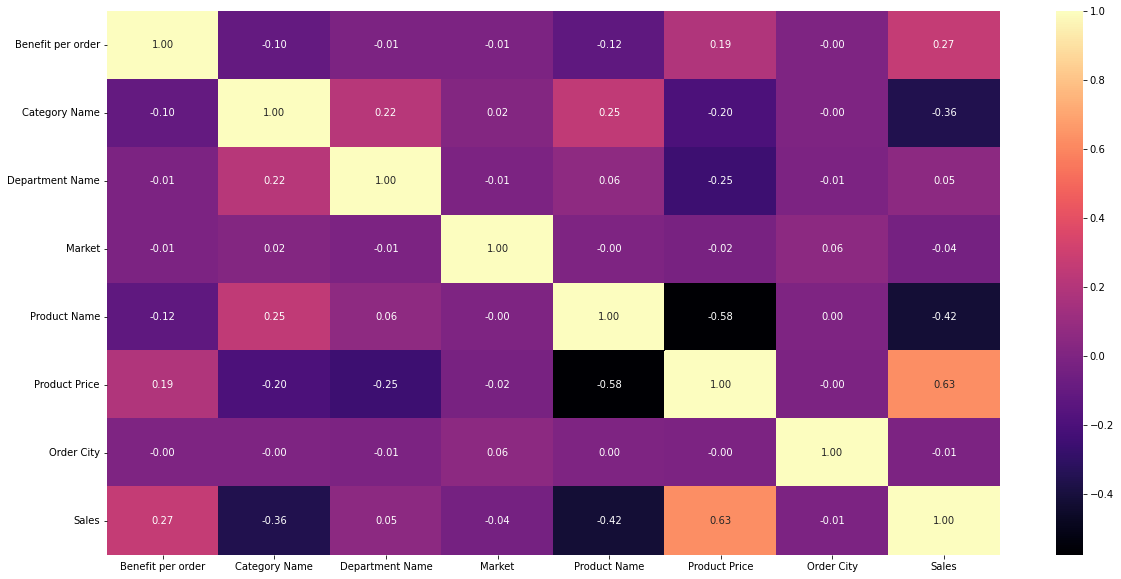

In [19]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [20]:
%pip install xgboost
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, RANSACRegressor, Lasso, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.3, random_state = 42)

In [22]:
lr_pipeline = Pipeline([("scaler", StandardScaler()), ("linear_regression", LinearRegression())])
ridge_pipeline = Pipeline([("scaler", StandardScaler()), ("ridge_regressor", Ridge(random_state = 42))])
lasso_pipeline = Pipeline([("scaler", StandardScaler()), ("lasso_regressor", Lasso(random_state = 42))])
random_forest_pipeline = Pipeline([("scaler", StandardScaler()), ("randomforest_regression", RandomForestRegressor(random_state = 42))])
xgboost_pipeline = Pipeline([("scaler", StandardScaler()), ("xgboost_regression", XGBRegressor())])
knn_pipeline = Pipeline([("scaler", StandardScaler()), ("knn_regression", KNeighborsRegressor())])

In [23]:
pipelines = [lr_pipeline, ridge_pipeline, lasso_pipeline,
            random_forest_pipeline, xgboost_pipeline, knn_pipeline]

pipe_dict = {0: "Linear Regression", 1: "Ridge",
            2: "Lasso", 3: "RandomForest", 4: "XGBoost",
            5: "Decision Tree", 6: "KNN"}

In [24]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(pipelines):
    score = cross_val_score(pipe, final_features,target, cv = 5)
    print(pipe_dict[i], ": ", score.mean())

Linear Regression :  0.512649009203823
Ridge :  0.5126492019864198
Lasso :  0.5132605393829104
RandomForest :  0.8661190804687466
[05:54:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:54:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:54:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:54:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:54:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost :  0.8553154420961281
Decision Tree :  0.7896983757440557


In [25]:
grid_params = [   
{"classifier": [XGBRegressor()],
     "classifier__n_estimators": [100,150,200,250,300],     
}
]

In [26]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", XGBRegressor())])
from sklearn.model_selection import  RandomizedSearchCV

In [27]:
random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)

In [28]:
best_model = random_search.fit(X_train, y_train)

Fitting 8 folds for each of 5 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[05:58:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [29]:
best_model.best_params_

{'classifier__n_estimators': 300, 'classifier': XGBRegressor(n_estimators=300)}

In [30]:
pipeline_XGBRegressor = Pipeline([('scaler', StandardScaler()), ('XGBRegressor',  XGBRegressor(importance_type='gain', n_estimators=300, ))])

In [31]:
model = pipeline_XGBRegressor.fit(X_train, y_train)

[05:58:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
XGB_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model.predict(X_train)})
XGB_train_predict.head()

,actual,predicted
99963,149.940002,188.107346
63538,210.850006,189.918457
6661,179.970001,191.431015
93913,129.990005,124.154808
90626,129.990005,129.791687


In [33]:
XGB_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model.predict(X_test)})
XGB_test_predict.head()

,actual,predicted
80120,199.990005,193.611725
19670,250.000000,106.296829
114887,249.899994,253.103455
120110,299.980011,302.120819
56658,119.970001,112.954552


In [34]:
predict = model.predict(X_test)

In [35]:
r2_score(y_test, predict, multioutput='uniform_average')

0.8686945920861402

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=predict, mode='markers' ,  name='predicted vs actual'))
fig.add_trace(go.Scatter(x=y_test , y=y_test, mode='lines' , name='actual'))


fig.update_layout(title='actual Sales vs predicted Sales', xaxis_title= 'Actual Score', yaxis_title = 'Predicted Score' , template= 'plotly_dark')

In [37]:
import joblib
joblib.dump(model,'/content/drive/MyDrive/Data/Sales_Prediction_Model.sav')

['/content/drive/MyDrive/Data/Sales_Prediction_Model.sav']